In [1]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import mixture
from scipy import linalg

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import warnings
import itertools
warnings.filterwarnings('ignore')

In [2]:
data=load_iris()
df=pd.DataFrame(data['data'],columns=data['feature_names'])
df['target']=data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X=data.data

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
#創一個列表來儲存所有結果的分數
results=[]

for n_cluster in range(2,11):
    kmeans=KMeans(n_clusters=n_cluster).fit(X)
    label=kmeans.labels_
    sil_coeff=silhouette_score(X,label,metric='euclidean')

    #使用慣性
    inertia=kmeans.inertia_

    print("For n_cluster={}, The Silhouette Coefficient is {}".format(
          n_cluster,sil_coeff))
    results.append({"n cluster":n_cluster,"Silhouette Coefficient":sil_coeff,"inertia":inertia})

For n_cluster=2, The Silhouette Coefficient is 0.6810461692117462
For n_cluster=3, The Silhouette Coefficient is 0.5528190123564095
For n_cluster=4, The Silhouette Coefficient is 0.49805050499728737
For n_cluster=5, The Silhouette Coefficient is 0.48874888709310566
For n_cluster=6, The Silhouette Coefficient is 0.36063088169631186
For n_cluster=7, The Silhouette Coefficient is 0.3533303451161853
For n_cluster=8, The Silhouette Coefficient is 0.351311397376415
For n_cluster=9, The Silhouette Coefficient is 0.33754182245944303
For n_cluster=10, The Silhouette Coefficient is 0.31268740449807664


In [6]:
results_df=pd.DataFrame(results)
results_df

,n cluster,Silhouette Coefficient,inertia
0,2,0.681046,152.347952
1,3,0.552819,78.851441
2,4,0.498051,57.228473
3,5,0.488749,46.446182
4,6,0.360631,39.372727
5,7,0.353330,34.436538
6,8,0.351311,30.374280
7,9,0.337542,27.894012
8,10,0.312687,26.280262


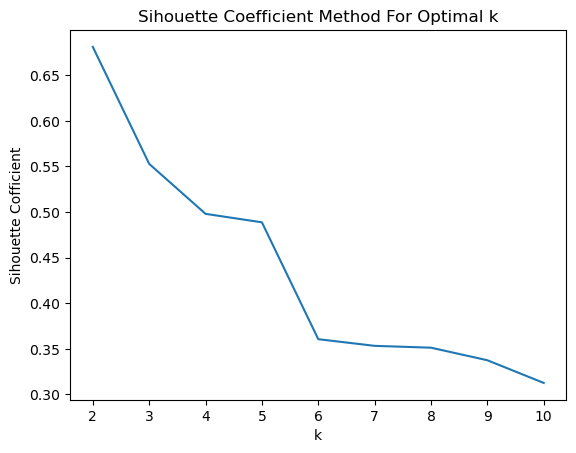

<Figure size 2000x1000 with 0 Axes>

In [7]:
#根據k輪廓係數的變化
plt.plot(results_df['n cluster'],results_df['Silhouette Coefficient'])
plt.xlabel('k')
plt.ylabel('Sihouette Cofficient')
plt.title('Sihouette Coefficient Method For Optimal k')
plt.figure(figsize=(20,10))
plt.show()

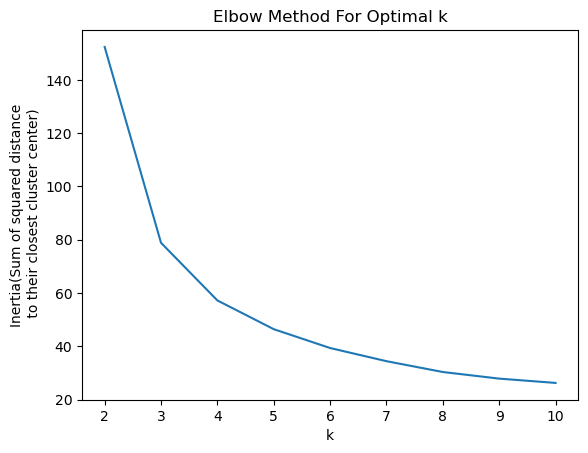

<Figure size 2000x1000 with 0 Axes>

In [8]:
#根據k Inertia的變化
plt.plot(results_df['n cluster'],results_df['inertia'])
plt.xlabel('k')
plt.ylabel('Inertia(Sum of squared distance\n to their closest cluster center)')
plt.title('Elbow Method For Optimal k')
plt.figure(figsize=(20,10))
plt.show()

## 查看完圖表後k值最好為3
## Silhoutte Coefficient,k=2
## Inertia(Elbow Method),k=3

### 畫實際資料

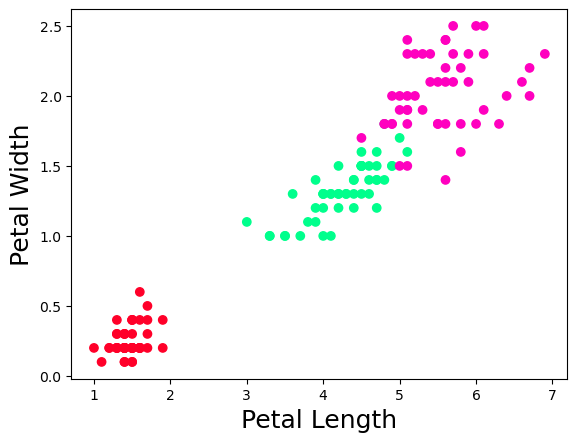

In [9]:
dataset = load_iris()
X = dataset.data
y = dataset.target
plt.scatter(X[:,2], X[:,3], c=y, cmap='gist_rainbow')
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

### 顯示k=2的效果

KMeans(n_clusters=2)


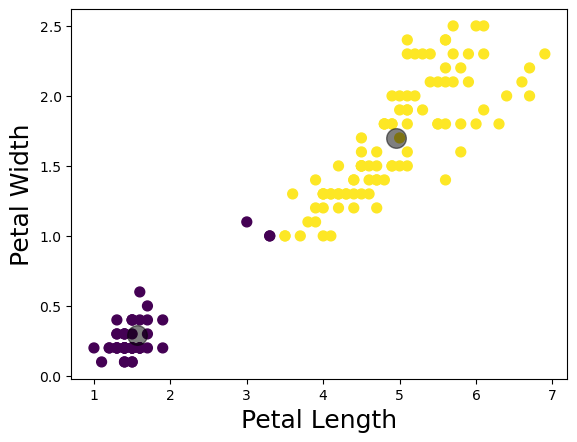

In [10]:
#將KMeans模型胃進資料
model=KMeans(n_clusters=2)
model.fit(dataset.data)
print(model)

y_kmeans=model.predict(X)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis') #畫花瓣長度、花瓣寬度的散點圖

centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5) #將質心顯示為灰色，透明度50%
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

### 顯示k=3的效果

KMeans(n_clusters=3)


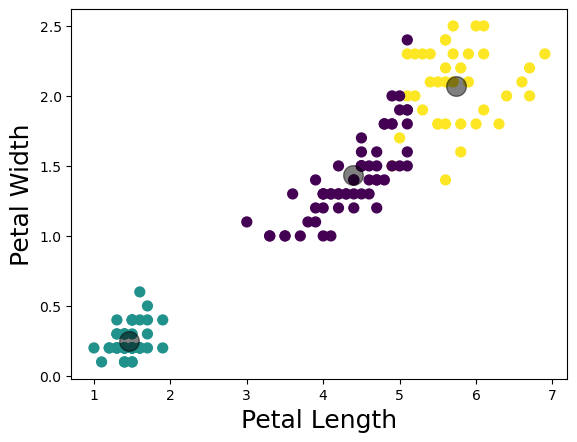

In [11]:
#將KMeans模型胃進資料
model=KMeans(n_clusters=3)
model.fit(dataset.data)
print(model)

y_kmeans=model.predict(X)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis') #畫花瓣長度、花瓣寬度的散點圖
centers = model.cluster_centers_

plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5) #將質心顯示為灰色，透明度50%
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

### 顯示k=4的效果

KMeans(n_clusters=4)


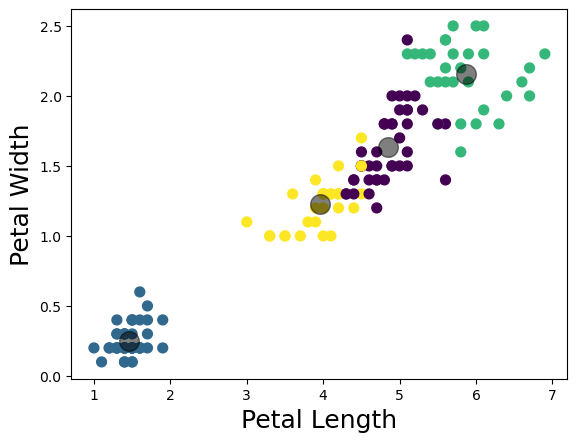

In [12]:
#將KMeans模型胃進資料
model=KMeans(n_clusters=4)
model.fit(dataset.data)
print(model)

y_kmeans=model.predict(X)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis') #畫花瓣長度、花瓣寬度的散點圖
centers = model.cluster_centers_

plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5) #將質心顯示為灰色，透明度50%
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

### 顯示k=5的效果

KMeans(n_clusters=5)


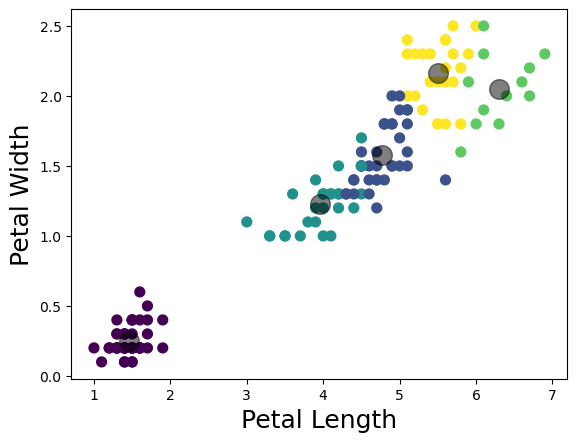

In [13]:
model=KMeans(n_clusters=5)
model.fit(dataset.data)
print(model)

y_kmeans=model.predict(X)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis') #畫花瓣長度、花瓣寬度的散點圖
centers = model.cluster_centers_

plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5) #將質心顯示為灰色，透明度50%
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

# 嘗試GMM 跟 DBSCAN

## GMM

In [14]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X)
pred_gmm = gmm.predict(X)

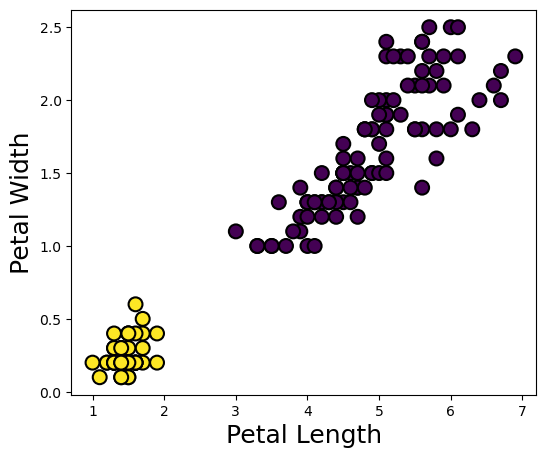

In [15]:
plt.figure( figsize=(6,5))

plt.scatter(X[:,2], X[:,3], c=pred_gmm, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis')) #畫花瓣長度、花瓣寬度的散點圖
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

In [16]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
pred_gmm = gmm.predict(X)

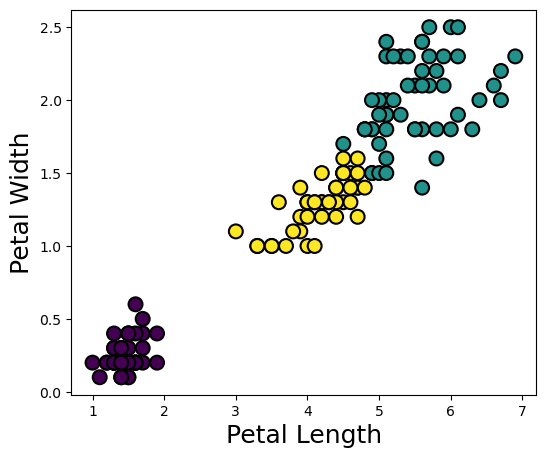

In [17]:
plt.figure(figsize=(6,5))

plt.scatter(X[:,2], X[:,3], c=pred_gmm, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis')) #畫花瓣長度、花瓣寬度的散點圖
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

## DBSCAN

In [18]:
neigh = NearestNeighbors(n_neighbors=2) #使用n_neighbours=2找到下一個最近的鄰居
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [19]:
distances #距離

array([[0.        , 0.1       ],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.33166248],
       [0.        , 0.2236068 ],
       [0.        , 0.1       ],
       [0.        , 0.14142136],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.2236068 ],
       [0.        , 0.14142136],
       [0.        , 0.24494897],
       [0.        , 0.41231056],
       [0.        , 0.36055513],
       [0.        , 0.34641016],
       [0.        , 0.1       ],
       [0.        , 0.33166248],
       [0.        , 0.14142136],
       [0.        , 0.28284271],
       [0.        , 0.14142136],
       [0.        , 0.45825757],
       [0.        , 0.2       ],
       [0.        , 0.3       ],
       [0.        , 0.17320508],
       [0.        , 0.2       ],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.

In [20]:
indices #指數

array([[  0,  17],
       [  1,  34],
       [  2,  47],
       [  3,  47],
       [  4,  37],
       [  5,  18],
       [  6,  47],
       [  7,  39],
       [  8,  38],
       [  9,  34],
       [ 10,  48],
       [ 11,  29],
       [ 12,   1],
       [ 13,  38],
       [ 14,  33],
       [ 15,  33],
       [ 16,  10],
       [ 17,   0],
       [ 18,   5],
       [ 19,  21],
       [ 20,  31],
       [ 21,  19],
       [ 22,   6],
       [ 23,  26],
       [ 24,  11],
       [ 25,  34],
       [ 26,  23],
       [ 27,  28],
       [ 28,  27],
       [ 29,  30],
       [ 30,  29],
       [ 31,  20],
       [ 32,  33],
       [ 33,  32],
       [ 34,   9],
       [ 35,  49],
       [ 36,  10],
       [ 37,   4],
       [ 38,   8],
       [ 39,   7],
       [ 40,  17],
       [ 41,   8],
       [ 42,  38],
       [ 43,  26],
       [ 44,  46],
       [ 45,   1],
       [ 46,  19],
       [ 47,   3],
       [ 48,  10],
       [ 49,   7],
       [ 50,  52],
       [ 51,  56],
       [ 52,

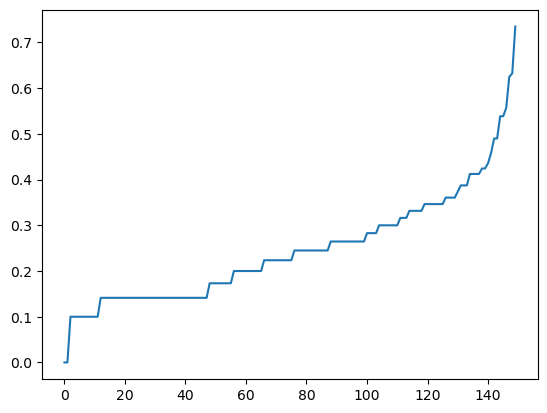

In [21]:
#對結果進行排序、繪圖找出最佳eps
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

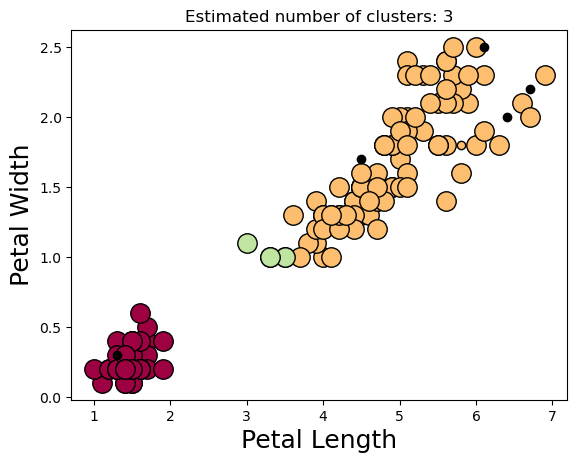

Estimated number of clusters: 3
Estimated number of noise points: 5


In [22]:
db = DBSCAN(eps=0.6, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

#如果群中標籤存在則忽略noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#畫結果
#黑色被用於移除noise
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_) #把noise print出來

# 最後的總結以這三種算法來看在iris資料集中GMM是比較好的(同樣在k=3)